### Aim
In previous experiments, the % spin shift (vmax) doesn't look like it reflects that of titrations, which may be a reslut of the small volumes being used.

In this experiment, I'll use only arachadonic acid, because it gives a good signal, and this time I'll use the deeper well labcyte 384 well plates, instead of the low dead volume plates. I've made some modifications to my PlateObjects script.

I'll do 2 concentration per plate, 20 and 40 µl, both with and without 1% triton added to the buffer. One plate will be low and the other high concentration so I can see if its the stochiometry that's having an effect.

**Plate 1**:
* Columns 1-6: 20 µl, no triton, 7-10 µM BM3
* Columns 7-12: 20 µl, no triton, 15-20 µM BM3
* Columns 13-18: 40 µl, no triton,  7-10 µM BM3
* Columns 19-24: 40 µl, no triton,  15-20 µM BM3

**Plate 2**:
* Columns 1-6: 20 µl, 1% triton, 7-10 µM BM3
* Columns 7-12: 20 µl, 1% triton, 15-20 µM BM3
* Columns 13-18: 40 µl, 1% triton,  7-10 µM BM3
* Columns 19-24: 40 µl, 1% triton,  15-20 µM BM3

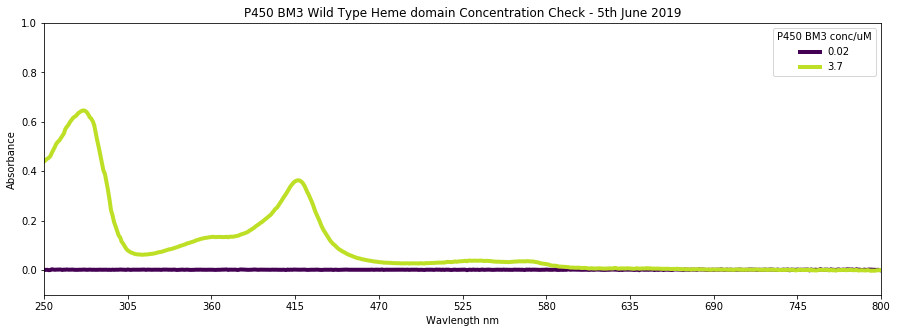

blank                0.017091
bm3WTheme_5in1000    3.704656
Name: Concs, dtype: float64

In [2]:
from ProteinConcCheck import dataset

ConcCheck = dataset('20191217_bm3WT_ConcCheck.csv')
ConcCheck.plot_traces()
ConcCheck.calc_conc()

In [3]:
# the trace was from protein diluted 5 in 1000, so the actual conc is
stock = 3.704656 /(5/1000)
print('Stock Conc:\t{} µM'.format(stock))

def V1(V2,C1,C2):
    return (C2*V2)/C1

# 5 mls of each should do
print('{} µl of stock 5 ml for 10 µM BM3'.format(round(V1(5000,stock,10),2)))
print('{} µl of stock 5 ml for 10 µM BM3'.format(round(V1(5000,stock,20),2)))

Stock Conc:	740.9312 µM
67.48 µl of stock 5 ml for 10 µM BM3
134.97 µl of stock 5 ml for 10 µM BM3


### Transfer map design

In [5]:
from PlateObjects import SourcePlateCompound, AssayPlate, Block

aracadonic = SourcePlateCompound('Arachadonic acid',['A'+str(i) for i in range(4,8)],ldv=False)
DMSO = SourcePlateCompound('DMSO',['B'+str(i) for i in range(4,15)],ldv=False)

assayplate1 = AssayPlate()
assayplate2 = AssayPlate()

for vol in [20,40]:
    for repeat in range(12):
        block1 = Block(aracadonic,DMSO,vol)
        assayplate1.AddBlocks(block1)
        
        block2 = Block(aracadonic,DMSO,vol)
        assayplate2.AddBlocks(block2)


assayplate1.MapWells()
assayplate2.MapWells()

transferMap1 = assayplate1.TransferPlan
transferMap2 = assayplate2.TransferPlan

transferMap1 = transferMap1.loc[transferMap1['Volume']>0]
transferMap2 = transferMap2.loc[transferMap2['Volume']>0]

transferMap1.to_csv('20191217_transferMap1.csv')
transferMap2.to_csv('20191217_transferMap2.csv')

I took specs of my working stocks, but didn't make enough to make dilutions to fit the traces within the dynamic range of the spec (0-1 apparently), but even if sensitivity diminishes outside of this range, I should still have a feel for what I have.

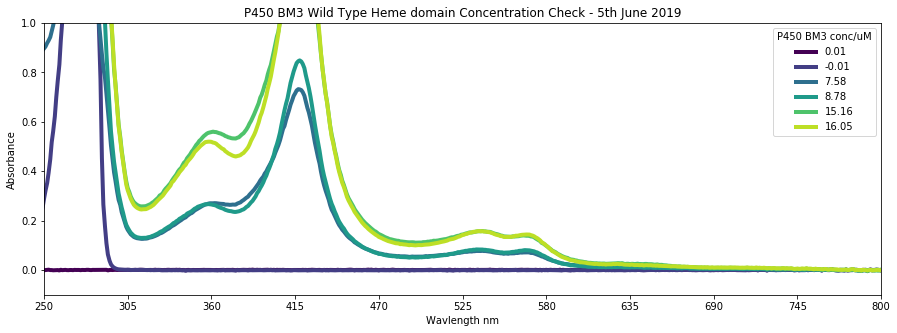

kpi                      0.011003
kpi_1%Triton            -0.008118
10umBM3_kpi              7.580117
10umBM3_kpi_triton1%     8.781889
20umBM3_kpi             15.161031
20umBM3_kpi_triton1%    16.051088
Name: Concs, dtype: float64

In [6]:
WorkingConcs = dataset('20191217_bm3WT_workingConcs.csv')
WorkingConcs.plot_traces()
WorkingConcs.calc_conc()